(500, 780)
(500, 780)
(500, 780)
(500, 780)
(500, 780)
(500, 780)


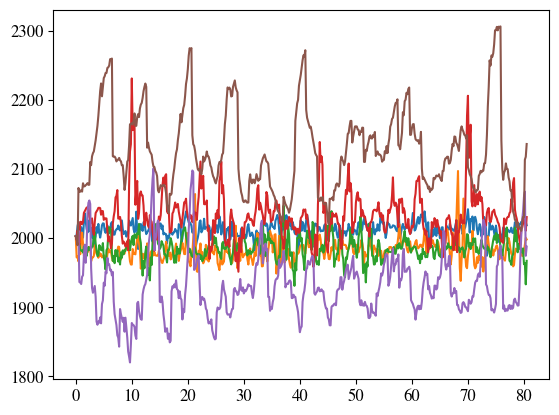

78333333.33349


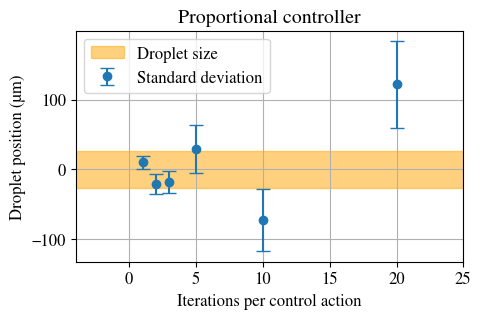

In [38]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.signal import correlate
import re
from matplotlib.patches import Rectangle

fps = 6.2
numberOfPixels = 247
Length = 25400/4/10


# Path to the directory containing the .avi files
path = '/scratch/aansari2/20240703/'

# List all .avi files starting with 'Dr'
avi_files = sorted(glob.glob(path + 'Dr*.avi'))

# Function to read frames and calculate mean frame
def get_mean_frame(file):
    cap = cv2.VideoCapture(file)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_frame[gray_frame > 200] = 255
        gray_frame[0:100] = 255
        gray_frame = -gray_frame + 255
        frames.append(gray_frame)
    cap.release()
    # Convert the list of frames to a NumPy array
    frame_data = np.array(frames)
    # Calculate the mean of the frame data along the time axis
    mean_frame = np.mean(frame_data, axis=0)
    return frame_data
# Loop through each file, calculate the mean frame, and display it
def find_max_parabolic(data):
    # Find the index of the maximum value
    max_index = np.argmax(data)
    vals = data[max_index+np.arange(-1,2)]
    slope = (vals[2]-vals[0])/2
    curve = vals[2]-2*vals[1]+vals[0]
    x= -(slope/(2*curve))
    return max_index+x


numbers = []
meanpos = []
stdpos = []

for file in avi_files:
    match = re.search(r'Dr(\d+)', file)
    if match:
        numbers.append(int(match.group(1)))
    frame_data = get_mean_frame(file)
    res = np.mean(frame_data,axis=2)
    autocorr = np.zeros(res.shape[0], dtype=float)
    print(res.shape)


    
    autocorr = np.zeros(res.shape[0], dtype=float)
    med = np.median(res)

    for i in range(res.shape[0]):
        corrfunc = correlate(res[0, :] - med, res[i, :] - med, mode='full', method='fft')

        autocorr[i] = find_max_parabolic(corrfunc)*Length/numberOfPixels
    t = np.arange(len(autocorr))/fps
    plt.plot(t,autocorr)
    meanpos.append(np.mean(autocorr))
    stdpos.append(np.std(autocorr))
plt.show()
# Set font properties
plt.rcParams['font.family'] = 'Nimbus Roman'
plt.rcParams['font.size'] = 12

# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(5, 3))

flowrate = 4.7*1.66666666667e7
dropletDiam = (6/np.pi*flowrate/1000)**(1/3)
print(flowrate)
rect = Rectangle((min(numbers)-10, -dropletDiam/2), max(numbers) - min(numbers)+20, dropletDiam, color='orange', alpha=0.5, label='Droplet size')
ax.add_patch(rect)

# Plot the error bars
ax.errorbar(numbers, meanpos - meanpos[0]+10, yerr=stdpos, fmt='o', capsize=5, label='Standard deviation')
ax.set_xlim([-5+min(numbers),5+max(numbers)])
ax.set_xlabel('Iterations per control action')
ax.set_ylabel('Droplet position (µm)')
ax.set_title('Proportional controller')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
ax.legend()
ax.grid(True)
plt.show()

In [28]:
import matplotlib.font_manager

# List all available fonts
available_fonts = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# Print the list of available fonts
for font in available_fonts:
    print(font)


C059
C059
C059
C059
Cantarell
Cantarell
Cantarell
Cantarell
D050000L
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Droid Sans
Droid Sans
Droid Sans Arabic
Droid Sans Armenian
Droid Sans Devanagari
Droid Sans Ethiopic
Droid Sans Ethiopic
Droid Sans Fallback
Droid Sans Georgian
Droid Sans Hebrew
Droid Sans Hebrew
Droid Sans Japanese
Droid Sans Tamil
Droid Sans Tamil
Droid Sans Thai
Inconsolata
Inconsolata
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans
Nimbus Mono PS
Nimbus Mono PS
Nimbus Mono PS
Nimbus Mono PS
Nimbus Roman
Nimbus Roman
Nimbus Roman
Nimbus Roman
Nimbus Sans
Nimbus Sans
Nimbus Sans
Nimbus Sans
Nimbus Sans Narrow